In [ ]:
# Importing packages
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
#Sample paragraph of text

text = """If you're worried about how AI will affect your job, the world of copywriters may offer a glimpse of the future.
Writer Benjamin Miller – not his real name – was thriving in early 2023. He led a team of more than 60 writers and editors, publishing blog posts and articles to promote a tech company that packages and resells data on everything from real estate to used cars. "It was really engaging work," Miller says, a chance to flex his creativity and collaborate with experts on a variety of subjects. But one day, Miller's manager told him about a new project. "They wanted to use AI to cut down on costs," he says. (Miller signed a non-disclosure agreement, and asked the BBC to withhold his and the company's name.)
A month later, the business introduced an automated system. Miller's manager would plug a headline for an article into an online form, an AI model would generate an outline based on that title, and Miller would get an alert on his computer. Instead of coming up with their own ideas, his writers would create articles around those outlines, and Miller would do a final edit before the stories were published. Miller only had a few months to adapt before he got news of a second layer of automation. Going forward, ChatGPT would write the articles in their entirety, and most of his team was fired. The few people remaining were left with an even less creative task: editing ChatGPT's subpar text to make it sound more human.
By 2024, the company laid off the rest of Miller's team, and he was alone. "All of a sudden I was just doing everyone's job," Miller says. Every day, he'd open the AI-written documents to fix the robot's formulaic mistakes, churning out the work that used to employ dozens of people."""

In [ ]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
import spacy

# 1.Stemmer

In [ ]:
# Removing punctuation

punctuation_pattern = r'[^\w\s]'
text_cleaned = re.sub(punctuation_pattern, '', text)

# Removing \n
text_cleaned = text_cleaned.replace('\n', '')

# Removing Stop Words from text
tokens = nltk.word_tokenize(text_cleaned.lower())
tokens_clean = [w for w in tokens if w not in nltk.corpus.stopwords.words("english")]

#the stemmer requires a language parameter
stem_en = SnowballStemmer(language='english')
stem_words = [stem_en.stem(word) for word in tokens_clean]

# Counting the unique word of text by methode nltk.FreDist()
fdist = nltk.FreqDist(stem_words)

# Converting to Pandas series
df_fdist = pd.Series(dict(fdist.most_common(20)))

df_fdist

miller     10
would       6
articl      4
ai          3
team        3
compani     3
use         3
say         3
job         2
real        2
writer      2
publish     2
work        2
creativ     2
day         2
manag       2
month       2
autom       2
outlin      2
edit        2
dtype: int64

# 2.Lemmatizer

In [ ]:
# Because spacy automatically splits into tokens so wee need to input a string
# Join the tokens back to string
text_join = ' '.join(tokens_clean)

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Process the text using spaCy
doc = nlp(text_join)

# Tokenize lemma text
lemma_word = [token.lemma_ for token in doc]

# Counting the unique word of text by methode nltk.FreDist()
fdist_1 = nltk.FreqDist(lemma_word)

# Converting to Pandas series
df_fdist_1 = pd.Series(dict(fdist_1.most_common(20)))

df_fdist_1

miller     10
would       6
article     4
ai          3
team        3
use         3
say         3
job         2
real        2
writer      2
publish     2
company     2
work        2
day         2
manager     2
month       2
outline     2
get         2
edit        2
people      2
dtype: int64

# 3. Comparing

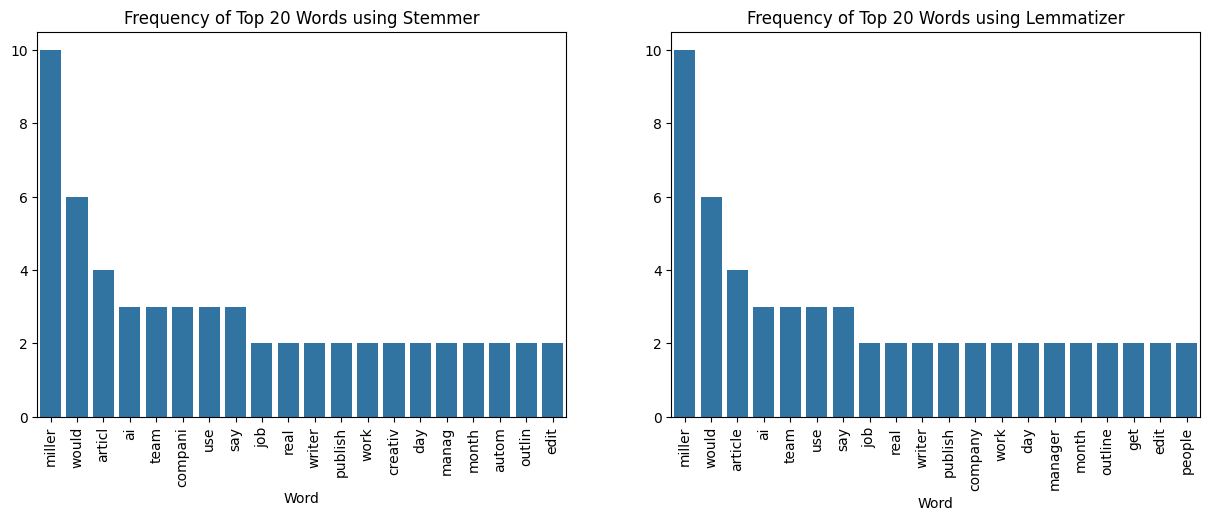

In [ ]:
# Comparing

f, axs = plt.subplots(1, 2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=df_fdist.index, y=df_fdist.values).set_title("Frequency of Top 20 Words using Stemmer")
plt.xticks(rotation=90)
plt.xlabel("Word")

plt.subplot(1, 2, 2)
sns.barplot(x=df_fdist_1.index, y=df_fdist_1.values).set_title("Frequency of Top 20 Words using Lemmatizer")

plt.xticks(rotation=90)
plt.xlabel("Word")
plt.show();